1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [38]:

# x - media / radice media
# p value da distribuzione poissoniana

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

,Hares,Lynxes,Carrots
1900.0,30000.0,4000.0,48300.0
1901.0,47200.0,6100.0,48200.0
1902.0,70200.0,9800.0,41500.0
1903.0,77400.0,35200.0,38200.0
1904.0,36300.0,59400.0,40600.0


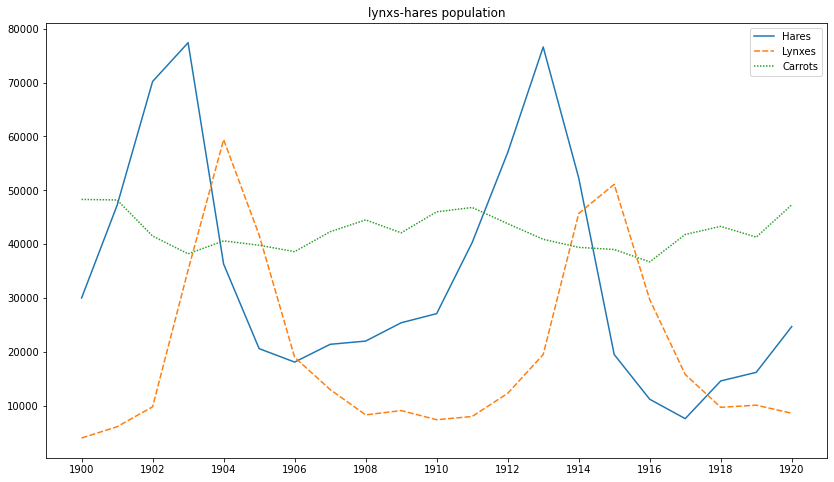

In [39]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns

species = np.array(['Hares', 'Lynxes', 'Carrots'])
data = np.loadtxt('populations.txt')
dataframe = pd.DataFrame(data[:, 1:], columns=species, index=data[:,0]) # the first line is commented
display(dataframe.head())

fig, ax = plt.subplots(figsize=(14,8))
sns.lineplot(data=dataframe)
ax.set_title('lynxs-hares population')
ax.xaxis.set_major_locator(MultipleLocator(2)) 


Period of the hares population: 10.50 years
Period of the lynxes population: 10.50 years
Period of the carrots population: 10.50 years


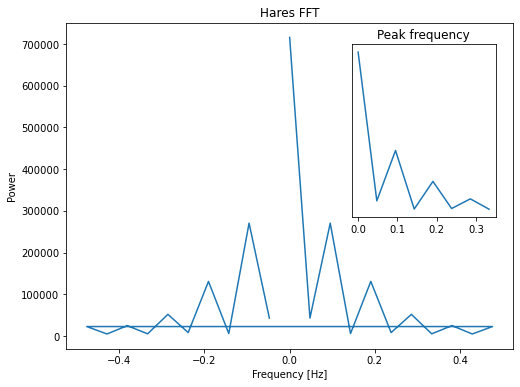

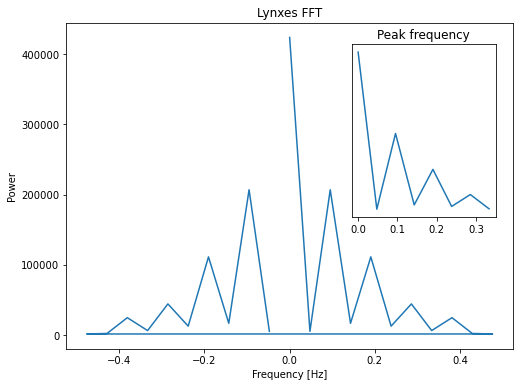

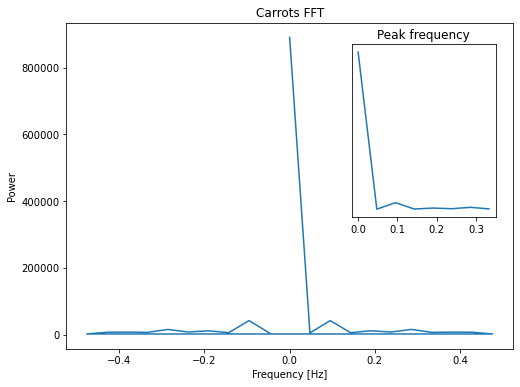

In [42]:
from scipy import fftpack
from scipy import signal

def FFT_analysis(population, verbose=False, plot=False, plot_title=''):
    time_step = 1

    # FFT of the population
    pop_fft = fftpack.fft(population)
    
    # Power 
    power = np.abs(pop_fft) 

    # Return the corresponding frequencies
    sample_freq = fftpack.fftfreq(population.size, d=time_step)
    
    # Plot the FFT power
    if plot:
        plt.figure(figsize=(8, 6))
        plt.plot(sample_freq, power)
        plt.xlabel('Frequency [Hz]')
        plt.ylabel('Power')
        if plot_title != '': plt.title(plot_title, fontsize=12)
        
        axes = plt.axes([0.62, 0.43, 0.25, 0.4])
        plt.title('Peak frequency')
        plt.plot(sample_freq[:8], power[:8])
        plt.setp(axes, yticks=[]);
        
    # Find the peak frequency
    pos_mask = np.where(sample_freq > 0) # the peak in 0 is not significant (null frequency)
    freqs = sample_freq[pos_mask]
    powes = power[pos_mask]
    
    peak_freq = freqs[powes.argmax()] 
    if verbose: print("Peak frequency: %.4f" %peak_freq)
    return peak_freq
        
hares_freq = FFT_analysis(dataframe['Hares'].values, plot=True, plot_title='Hares FFT')
print('Period of the hares population: %.2f years' %(1/hares_freq))
lynxes_freq = FFT_analysis(dataframe['Lynxes'].values, plot=True, plot_title='Lynxes FFT')
print('Period of the lynxes population: %.2f years' %(1/lynxes_freq))
carrots_freq = FFT_analysis(dataframe['Carrots'].values, plot=True, plot_title='Carrots FFT')
print('Period of the carrots population: %.2f years' %(1/carrots_freq))


4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

(474, 630)


Text(0.5, 1.0, 'Filtered image')

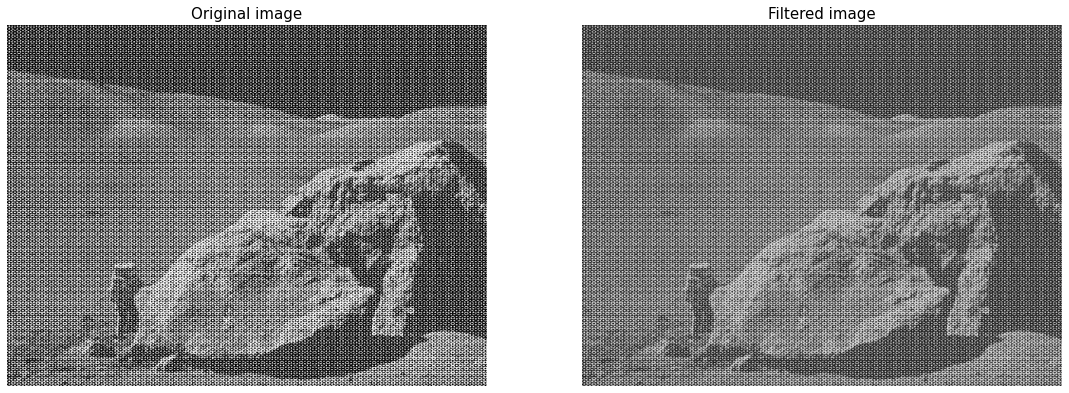

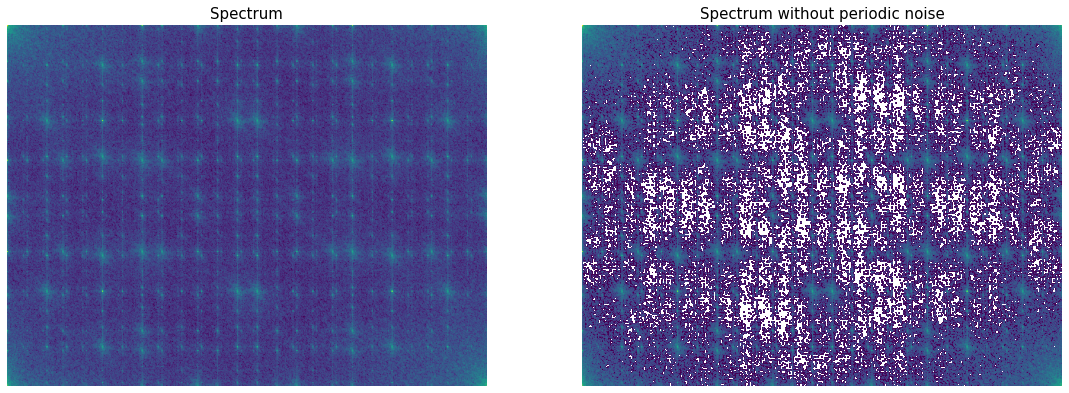

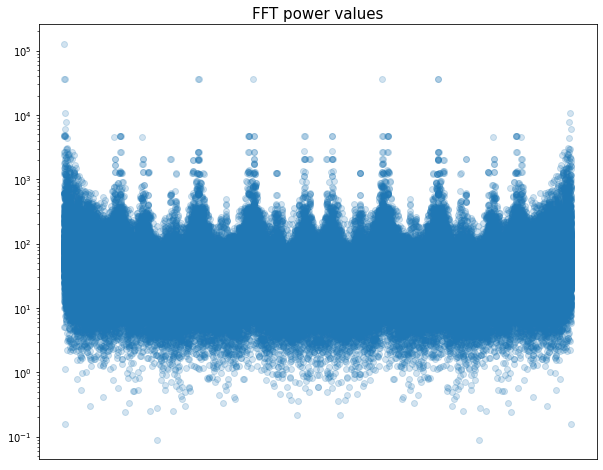

In [41]:
from matplotlib.colors import LogNorm

image = plt.imread("moonlanding.png")
fig_image, (im1, im2) = plt.subplots(1, 2, figsize=(18.9, 7.11))
im1.imshow(image, cmap = 'gray');
im1.set_title('Original image', fontsize=15)
im1.axis('off')
im2.axis('off')

print(image.shape)

# 2D FFT of the image
image_fft = fftpack.fft2(image)

# Power
power = np.abs(image_fft)

# Plot the spectrum
fig_spec, (sp1, sp2) = plt.subplots(1, 2, figsize=(18.9, 7.11))
sp1.axis('off')
sp2.axis('off')

sp1.set_title('Spectrum', fontsize=15)
sp1.imshow(power, norm=LogNorm(vmin=5))

# Inspect the spectrum
fig3, ax = plt.subplots(figsize=(10, 8))
ax.scatter(np.arange(298620), power.flatten(), alpha=0.2)
ax.set_yscale('log')
ax.set_xticks([])
ax.set_title('FFT power values', fontsize=15)

# Set the noise regions to zero
image_fft[power<40]=0

# Plot the spectrum without noise
sp2.set_title('Spectrum without periodic noise', fontsize=15)
sp2.imshow(np.abs(image_fft), norm=LogNorm(vmin=5))

# Inverse Fourier transform
filtered_image = np.real(fftpack.ifft2(image_fft))

# Plot the resulting image
im2.imshow(filtered_image, cmap = 'gray');
im2.set_title('Filtered image', fontsize=15)
